# DDoS Network Intrusion Detection and Classification

In [124]:
import warnings
warnings.filterwarnings("ignore")

time: 615 µs


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

time: 9.75 ms


In [126]:
from __future__ import print_function
import time

time: 661 µs


In [127]:
# This extension for sound notification and cell completion time
get_ipython().magic('load_ext cellevents')

The cellevents extension is already loaded. To reload it, use:
  %reload_ext cellevents
time: 1.03 ms


## Loading dataframe with all attacks

In [128]:
# Data after EDA
df_clean = pd.read_csv('mydata/ddos_clean.csv')

time: 11.2 s


In [129]:
# Run df_clean for running models and further anlyses
df = df_clean.copy()

time: 282 ms


### EDA

In [132]:
df[' Label'].unique()

array([5, 2, 3, 1, 4, 0])

time: 29.5 ms


In [133]:
df.columns

Index(['Unnamed: 0', ' Source Port', ' Destination Port', ' Flow Duration',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Packet Length Variance',
       ' Average Packet Size', ' Avg Fwd Segment Size', ' Fwd Header Length.1',
       'Subflow Fwd Packets', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', 'Active Mean',
       ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
       ' Idle Min', ' Label'],
      dtype='object')

time: 5.62 ms


In [134]:
# For reproducibility ofresults
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

time: 129 ms


### Converting multiclass to binary

In [135]:
pd.set_option('display.min_rows', None)

time: 1.07 ms


In [136]:
# Converting multiclass to binary
bin_df = df.replace({' Label': {1:'1', 2:'1', 3:'1', 4:'1', 5:'1', 0:'0'}})

time: 1.68 s


In [137]:
# Converting to type int
bin_df[' Label'].astype(int)
pd.set_option('display.min_rows', None)

time: 197 ms


In [138]:
# Variable assignment
X = bin_df.iloc[:,:-1]
y = bin_df.iloc[:,-1]

time: 1.13 s


In [139]:
# Balancing data
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))


Original dataset shape Counter({'1': 2378929, '0': 7874})
Resampled dataset shape Counter({'0': 7874, '1': 7874})
time: 9.79 s


In [113]:
# Scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

time: 25.3 ms


### PCA - binary

This section used methods from: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [87]:
from sklearn.decomposition import PCA

time: 839 µs


In [114]:
# Declaring feat_cols variable and dataframe for binary x variables 
feat_cols = X.columns

bin_df = pd.DataFrame(X,columns=feat_cols)
bin_df['y'] = y
bin_df[' Label'] = bin_df['y'].apply(lambda i: str(i))

time: 113 ms


In [116]:
# Instantiate & fit PCA model 
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)
bin_df['pca-one'] = pca_result[:,0]
bin_df['pca-two'] = pca_result[:,1] 
bin_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29344346 0.10517233 0.07738863]
time: 51.9 ms


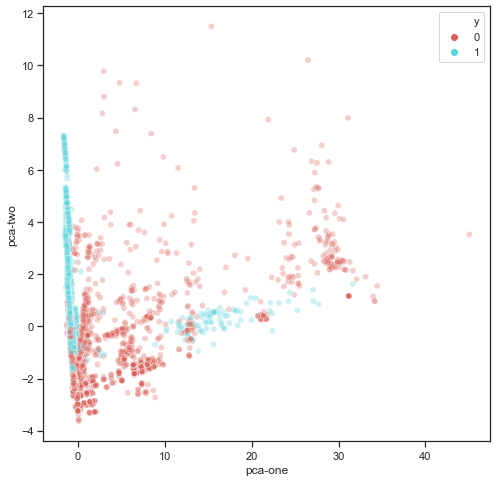

time: 4.5 s


In [117]:
# Plotting PCA for binary classification
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=bin_df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

### t-SNE - binary

In [118]:
# Instantiate & fit tSNE model 
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scaled)
bin_df['tsne-2d-one'] = tsne_results[:,0]
bin_df['tsne-2d-two'] = tsne_results[:,1]

time: 1min 28s


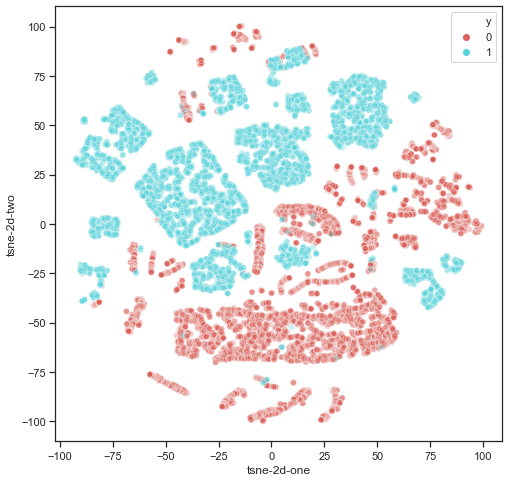

time: 1.82 s


In [119]:
# Plotting tSNE for binary classification
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=bin_df,
    legend="full",
    alpha=0.3
)

### PCA - multiclass

In [141]:
# Variable assignment
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

time: 742 ms


In [142]:
# Undersampling again
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({3: 818656, 5: 626929, 2: 435986, 4: 316458, 1: 180900, 0: 7874})
Resampled dataset shape Counter({0: 7874, 1: 7874, 2: 7874, 3: 7874, 4: 7874, 5: 7874})
time: 2.28 s


In [146]:
# Scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

time: 555 ms


In [147]:
# Declaring feat_cols variable and dataframe for binary x variables 
feat_cols = X.columns

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df[' Label'] = df['y'].apply(lambda i: str(i))

time: 28.3 ms


In [148]:
# Instantiate & fit PCA model 
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27407973 0.0976086  0.0784408 ]
time: 153 ms


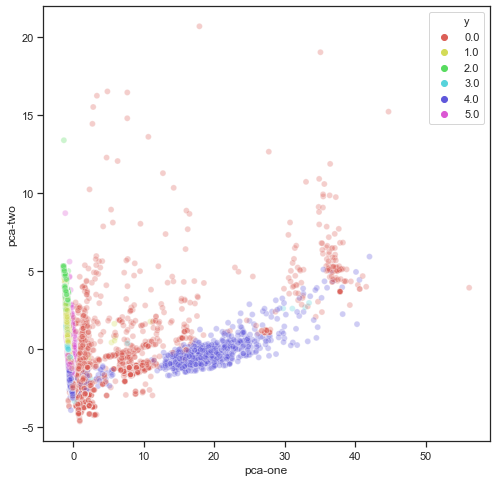

time: 5.71 s


In [151]:
# Plotting PCA for multiclass
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

### t-SNE - multiclass

In [152]:
# Instantiate & fit tSNE model 
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_scaled)
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

time: 4min 59s


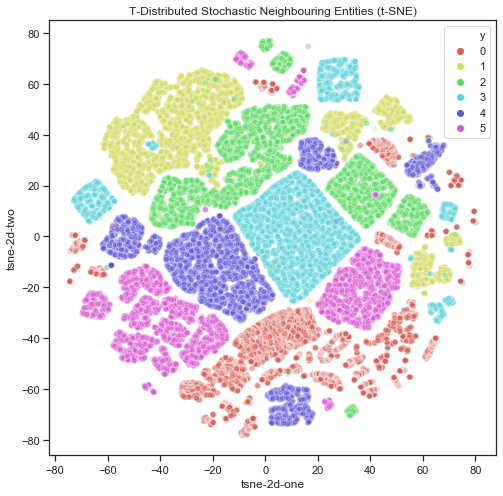

time: 2.9 s


In [155]:
# Plotting tSNE for multi-class
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df,
    legend="full",
    alpha=0.3,
    
)
plt.title ("T-Distributed Stochastic Neighbouring Entities (t-SNE)")
plt.show()